# Text Processing

In [14]:
import pandas as pd

data = pd.read_csv("twitter_dataset.csv")

data.head()

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


In [15]:
data.columns

Index(['Tweet_ID', 'Username', 'Text', 'Retweets', 'Likes', 'Timestamp'], dtype='object')

## Step 1:  Remove URLs, Mentions, and Hashtags



*  Remove the URL
*  Remove mentions and hastags



In [16]:
import re

def clean_text(text):
  text = re.sub(r'http\S+|www\S+','',text)
  text = re.sub(r'@\w+|#\w+','',text)
  return text


data['clean'] = data['Text'].apply(clean_text)
print(data[['Text','clean']].head(n=2))

                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   

                                               clean  
0  Party least receive say or single. Prevent pre...  
1  Hotel still Congress may member staff. Media d...  


## Step 2: Lowercase Conversion

In [17]:
data['clean'] = data['clean'].str.lower()
print(data[['Text','clean']].head(n=2))

                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   

                                               clean  
0  party least receive say or single. prevent pre...  
1  hotel still congress may member staff. media d...  


## Step 3: Remove Punctuation and Numbers

In [18]:
import string

def remove_pn(text):
  return ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

data['clean'] = data['Text'].apply(remove_pn)
print(data[['Text','clean']].head(n=6))

                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   
5  Cell without report weight. Could father chang...   

                                               clean  
0  Party least receive say or single Prevent prev...  
1  Hotel still Congress may member staff Media dr...  
2  Nice be her debate industry that year Film whe...  
3  Laugh explain situation career occur serious F...  
4  Involve sense former often approach government...  
5  Cell without report weight Could father change...  


## Step 4: Tokenization

In [22]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')
data['Tokens'] = data['clean'].apply(word_tokenize)
print(data[['Text', 'Tokens']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   

                                              Tokens  
0  [Party, least, receive, say, or, single, Preve...  
1  [Hotel, still, Congress, may, member, staff, M...  
2  [Nice, be, her, debate, industry, that, year, ...  
3  [Laugh, explain, situation, career, occur, ser...  
4  [Involve, sense, former, often, approach, gove...  


## Step 5: Remove Stop Words

In [23]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
data['Tokens'] = data['Tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data[['Text', 'Tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   

                                              Tokens  
0  [Party, least, receive, say, single, Prevent, ...  
1  [Hotel, still, Congress, may, member, staff, M...  
2  [Nice, debate, industry, year, Film, generatio...  
3  [Laugh, explain, situation, career, occur, ser...  
4  [Involve, sense, former, often, approach, gove...  


## Stemming or Lemmatization

In [24]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_words(tokens):
    return [stemmer.stem(word) for word in tokens]

data['Tokens'] = data['Tokens'].apply(stem_words)
print(data[['Text', 'Tokens']].head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   

                                              Tokens  
0  [parti, least, receiv, say, singl, prevent, pr...  
1  [hotel, still, congress, may, member, staff, m...  
2  [nice, debat, industri, year, film, gener, pus...  
3  [laugh, explain, situat, career, occur, seriou...  
4  [involv, sens, former, often, approach, govern...  


In [25]:
def lemmatize_words(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

data['Tokens'] = data['Tokens'].apply(lemmatize_words)
print(data[['Text', 'Tokens']].head())

                                                Text  \
0  Party least receive say or single. Prevent pre...   
1  Hotel still Congress may member staff. Media d...   
2  Nice be her debate industry that year. Film wh...   
3  Laugh explain situation career occur serious. ...   
4  Involve sense former often approach government...   

                                              Tokens  
0  [parti, least, receiv, say, singl, prevent, pr...  
1  [hotel, still, congress, may, member, staff, m...  
2  [nice, debat, industri, year, film, gener, pus...  
3  [laugh, explain, situat, career, occur, seriou...  
4  [involv, sen, former, often, approach, govern,...  



 Text processing completed
 # Visualization

In [26]:
from collections import Counter

all_tokens = [word for tokens in data['Tokens'] for word in tokens]
word_counts = Counter(all_tokens)
print(word_counts.most_common(10))

[('manag', 1003), ('success', 772), ('major', 752), ('product', 727), ('meet', 727), ('cultur', 722), ('final', 721), ('gener', 712), ('polit', 709), ('includ', 705)]


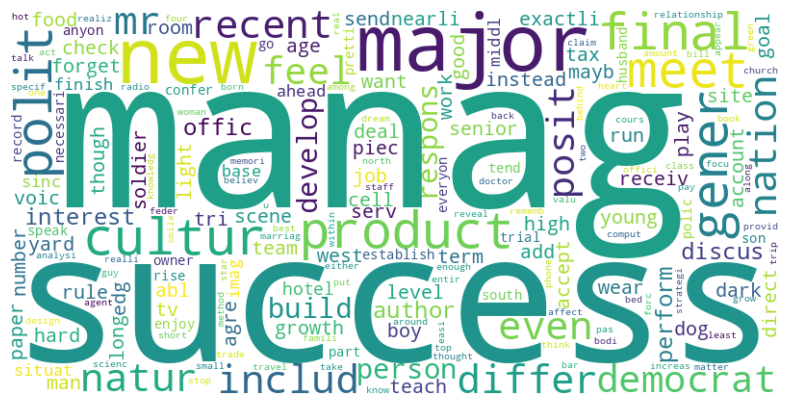

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()